In [1]:
# Program for Transfer learning from Perfect CSI to Imperfect CSI case at outage probability (epsilon) = 0.3679.
# It also calulates sum-rate for original data and sum-rate after transfer learning with less training data.
# It also verifies all the constraints for the testing data and the training data.
# The data is generated using the Imperfect scenario algorithm. 

In [2]:
# Importing library

import time

# Below four lines at top for generalization

from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn import model_selection

from sklearn.decomposition import PCA
#To show the output within the jupyter notebook itself!
%matplotlib inline 

from keras import layers
from keras import models
from keras.layers import Activation, LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
from keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# Input data i.e. xd # channel gains

inputs = pd.read_csv("xd_imperf_CSI.csv", header=None)
inputs.shape

(100000, 40)

In [4]:
type(inputs)

pandas.core.frame.DataFrame

In [5]:
inputs.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000021,0.000087,0.000005,0.000006,0.000020,3.799487,0.082692,4.555877,0.073405,0.106689,...,3.450000e-07,7.320000e-07,4.160000e-07,3.370000e-07,3.160000e-07,1.190000e-06,1.240000e-06,1.530000e-06,5.950000e-06,8.480000e-07
1,0.000006,0.000005,0.000004,0.000031,0.000032,0.257382,0.358181,0.192515,0.110031,0.225655,...,4.330000e-05,7.120000e-07,1.460000e-05,3.790000e-07,1.740000e-06,2.040000e-06,2.230000e-06,3.840000e-06,4.130000e-07,3.590000e-07
2,0.000025,0.000038,0.000005,0.000178,0.000014,0.058885,10.225773,0.068503,0.220606,4.868746,...,3.060000e-06,1.000000e-05,5.610000e-07,9.080000e-07,1.170000e-06,5.830000e-07,1.610000e-06,2.760000e-07,3.380000e-07,1.260000e-05
3,0.000004,0.000006,0.000042,0.000024,0.000015,10117.465370,4.961797,0.069956,0.157457,0.307459,...,5.530000e-06,7.630000e-07,6.000000e-07,2.950000e-07,1.090000e-05,1.620000e-06,1.700000e-06,1.880000e-06,4.230000e-07,6.650000e-05
4,0.000115,0.000004,0.000115,0.000030,0.000005,24.066187,0.067384,0.663461,11.179244,0.678405,...,2.190000e-07,1.820000e-06,3.700000e-07,9.340000e-06,2.910000e-07,9.840000e-08,3.340000e-07,1.450000e-06,2.420000e-06,6.240000e-07


In [6]:
# Output data1 i.e. ypd # power allocations

output1 = pd.read_csv("ypd_imperf_CSI.csv", header=None)
output1.shape

(100000, 50)

In [7]:
output1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.062966,0.064992,0.062882,0.064190,0.061733,0.063078,0.070798,0.063007,0.020228,0.063004,...,0.025634,0.040721,0.027516,0.024599,0.025306,0.042329,0.045323,0.052945,0.164450,0.031525
1,0.018495,0.061903,0.053390,0.063225,0.057583,0.062286,0.061840,0.061904,0.053147,0.062036,...,0.432421,0.018660,0.221676,0.397557,0.040231,0.043642,0.047201,0.076179,0.395464,0.774649
2,0.066753,0.060301,0.069880,0.064622,0.061043,0.062402,0.007717,0.070200,0.064791,0.063005,...,0.013120,0.035763,0.553695,0.513892,0.635656,0.035215,0.076812,0.021375,0.023521,0.564734
3,0.062641,0.062515,0.063332,0.062534,0.062706,0.061889,0.012086,0.025035,0.048719,0.058285,...,0.418868,0.024722,0.771912,0.628233,0.226815,0.036768,0.076094,0.081788,0.025402,0.317979
4,0.062960,0.065657,0.063165,0.062912,0.063191,0.012016,0.063102,0.062738,0.061150,0.062629,...,0.697065,0.041261,0.833353,0.168295,0.814349,0.017210,0.025266,0.052281,0.054374,0.035715


In [8]:
# Output data2 i.e. ybdr # channel assignments

output2 = pd.read_csv("ybdr_imperf_CSI.csv", header=None)
output2.shape

(100000, 25)

In [9]:
output2.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.367004,0.137576,0.332458,0.167140,-0.004178,0.306742,0.323720,0.344570,0.000000,0.024968,...,0.182635,0.084420,0.192283,0.325526,0.215135,0.206211,0.305615,0.156238,-0.004449,0.336385
1,0.000000,0.287106,0.235054,0.319592,0.158249,0.354396,0.192221,0.267708,0.042549,0.143126,...,0.000000,0.362186,0.008533,0.387368,0.241913,0.260880,0.088743,0.104773,0.254104,0.291500
2,0.225063,0.253052,0.182116,0.206766,0.133003,0.126294,-0.003187,0.252498,0.244046,0.380350,...,0.150798,0.196790,0.205340,0.159507,0.287565,0.254235,0.333836,0.200397,0.214020,-0.002489
3,0.093096,0.414138,0.120167,0.016331,0.356269,0.573608,-0.007118,-0.006944,-0.008124,0.448578,...,-0.003816,0.347760,0.336788,0.326975,-0.007708,0.094594,0.247804,0.209428,0.451658,-0.003484
4,0.280687,0.190803,0.185641,0.155674,0.187195,-0.003657,0.216024,0.230694,0.341114,0.215826,...,0.309523,0.114088,0.242605,0.088478,0.245305,0.297062,0.204889,0.138157,0.179650,0.180242


In [10]:
# Both output data combined i.e. ypd and ybdr (power allocations + channel assignments)

outputc = pd.concat([output1, output2], axis=1)
outputc.shape

(100000, 75)

In [11]:
outputc.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.062966,0.064992,0.062882,0.064190,0.061733,0.063078,0.070798,0.063007,0.020228,0.063004,...,0.182635,0.084420,0.192283,0.325526,0.215135,0.206211,0.305615,0.156238,-0.004449,0.336385
1,0.018495,0.061903,0.053390,0.063225,0.057583,0.062286,0.061840,0.061904,0.053147,0.062036,...,0.000000,0.362186,0.008533,0.387368,0.241913,0.260880,0.088743,0.104773,0.254104,0.291500
2,0.066753,0.060301,0.069880,0.064622,0.061043,0.062402,0.007717,0.070200,0.064791,0.063005,...,0.150798,0.196790,0.205340,0.159507,0.287565,0.254235,0.333836,0.200397,0.214020,-0.002489
3,0.062641,0.062515,0.063332,0.062534,0.062706,0.061889,0.012086,0.025035,0.048719,0.058285,...,-0.003816,0.347760,0.336788,0.326975,-0.007708,0.094594,0.247804,0.209428,0.451658,-0.003484
4,0.062960,0.065657,0.063165,0.062912,0.063191,0.012016,0.063102,0.062738,0.061150,0.062629,...,0.309523,0.114088,0.242605,0.088478,0.245305,0.297062,0.204889,0.138157,0.179650,0.180242


In [12]:
# Pre-processing

x = inputs.values  # converting dataframe "inputs" into array form
x

array([[2.07000e-05, 8.70000e-05, 5.42000e-06, ..., 1.53000e-06,
        5.95000e-06, 8.48000e-07],
       [5.94000e-06, 5.00000e-06, 4.46000e-06, ..., 3.84000e-06,
        4.13000e-07, 3.59000e-07],
       [2.48000e-05, 3.76000e-05, 4.85000e-06, ..., 2.76000e-07,
        3.38000e-07, 1.26000e-05],
       ...,
       [2.77000e-05, 1.75000e-05, 8.75000e-06, ..., 6.74000e-07,
        2.13000e-07, 2.66000e-07],
       [5.01000e-06, 4.67000e-05, 5.01000e-06, ..., 3.48000e-07,
        2.25000e-07, 2.39000e-07],
       [2.11158e-04, 3.82000e-06, 6.01000e-05, ..., 1.14000e-05,
        2.85000e-06, 4.67000e-05]])

In [13]:
x.shape

(100000, 40)

In [14]:
y = outputc.values # converting dataframe "outputc" in array form i.e. 'y' is now in array form 
y # y is combination of power assignments and channel assignments both.

array([[ 0.06296569,  0.06499165,  0.06288236, ...,  0.15623803,
        -0.00444893,  0.33638455],
       [ 0.01849512,  0.06190345,  0.05339005, ...,  0.10477329,
         0.25410437,  0.2914998 ],
       [ 0.06675301,  0.06030063,  0.0698801 , ...,  0.20039713,
         0.21402041, -0.00248876],
       ...,
       [ 0.06443045,  0.06372662,  0.04018295, ...,  0.19732785,
         0.33673501,  0.3567634 ],
       [ 0.06059535,  0.06194541,  0.05314486, ...,  0.07897355,
         0.40019504,  0.15152195],
       [ 0.0644998 ,  0.06716786,  0.06294923, ...,  0.11289442,
         0.42302779, -0.00461744]])

In [15]:
y.shape

(100000, 75)

In [16]:
##################### Sum-rate with original data ################################

In [17]:
# Sum-rate with original data

NO=1.19*(10**-6)
C_min=1.25892541179416
D_min=1.25892541179416

pb=y[:,0:25]
pd=y[:,25:50]
B=y[:,50:75]
gb=x[:,0:5]
gd=x[:,5:10]
hb=x[:,10:15]

epsilon=0.3679 
hc=x[:,15:40]
hc_inverse_cdf=hc*(-1*math.log(epsilon))

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

# Converting ybdr_new in ybd_binary i.e. converting continuous channel assignments 
# into binary form 

sm_BW=np.zeros(len(B))
B_binary_array=[]
for rows in B:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    B_binary_array.append(tempList)
    
for i in range (len(B)): # 100000
    for j in range (B.shape[1]): # 25
        if B_binary_array[i][j]==1:  
            if j<5:
                gb1=gb[i][0]
                gd1=gd[i][j] 
                hb1=hb[i][j]
            elif j>=5 and j<10:
                gb1=gb[i][1]
                gd1=gd[i][j-5]
                hb1=hb[i][j-5]
            elif j>=10 and j<15:
                gb1=gb[i][2]
                gd1=gd[i][j-10]
                hb1=hb[i][j-10]
            elif j>=15 and j<20:
                gb1=gb[i][3]
                gd1=gd[i][j-15]
                hb1=hb[i][j-15]
            elif j>=20:
                gb1=gb[i][4]
                gd1=gd[i][j-20]
                hb1=hb[i][j-20]
                
            ############## SINR for constraint 1(d) 
            SINR_D=((pb_scaled[i][j]*gb1)/(NO+(pd_scaled[i][j]*hc_inverse_cdf[i][j]))) # To use scaled pb and pd
#             print(SINR_D)
            sm1=math.log2(1+SINR_D)  # sm- sum-rate for contraint 1(d)
#             print(sm1)

            ############## SINR for constraint 1(e)
            SINR_E=((pd_scaled[i][j]*gd1)/(NO+(pb_scaled[i][j]*hb1)))  # To use scaled pb and pd
#             print(SINR_E)
            sm2=math.log2(1+SINR_E)  # sm- sum-rate for contraint 1(e)
#             print(sm2)

            ########## Sum-rate calculation
            BW=15000  # Band-width
            sm_tot=sm1+sm2 # total sum-rate
#             print(sm_tot) 
            sm_BW[i]=sm_BW[i]+BW*sm_tot 
#             print(sm_BW) 
sm_avg_org=np.mean(sm_BW) # average sum-rate
print(sm_avg_org)

1416712.4565927594


In [18]:
sm_avg_org

1416712.4565927594

In [19]:
# Splitting data for training and testing 
# Here both x and y are in array form (non-scaled)

from sklearn.model_selection import train_test_split

test_size = 0.5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=False, random_state=42) 

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.99, shuffle=True)

In [20]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [21]:
##################### Transfer learning Strategy ##########################

In [22]:
# Loading the saved baseline model # 3 hidden layers case (optimal case) # Transfer learning

model = load_model('baseline_model_perfect_CSI.h5')

# Note- Once loaded, the model can be compiled and fit as per normal ways.

In [23]:
# summarize the pre-trained model (i.e. optimization project model)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1640      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 75)                450       
Total params: 3,015
Trainable params: 3,015
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compiling model 

from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='ADAM', loss='mean_squared_error', metrics = ['mean_absolute_error']) 
monitor = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [25]:
# To get training start time

tic = time.perf_counter() # start time 

In [26]:
# Re-fitting model to training set

model_history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, verbose=2, callbacks=[monitor], epochs=1000)

Epoch 1/1000
196/196 - 2s - loss: 0.1791 - mean_absolute_error: 0.2696 - val_loss: 0.1400 - val_mean_absolute_error: 0.2347
Epoch 2/1000
196/196 - 1s - loss: 1.0167 - mean_absolute_error: 0.2143 - val_loss: 0.0875 - val_mean_absolute_error: 0.1888
Epoch 3/1000
196/196 - 1s - loss: 0.0707 - mean_absolute_error: 0.1726 - val_loss: 0.0567 - val_mean_absolute_error: 0.1591
Epoch 4/1000
196/196 - 1s - loss: 0.0477 - mean_absolute_error: 0.1490 - val_loss: 0.0405 - val_mean_absolute_error: 0.1404
Epoch 5/1000
196/196 - 1s - loss: 0.0361 - mean_absolute_error: 0.1339 - val_loss: 0.0328 - val_mean_absolute_error: 0.1284
Epoch 6/1000
196/196 - 1s - loss: 0.0311 - mean_absolute_error: 0.1245 - val_loss: 0.0298 - val_mean_absolute_error: 0.1213
Epoch 7/1000
196/196 - 1s - loss: 0.0291 - mean_absolute_error: 0.1190 - val_loss: 0.0287 - val_mean_absolute_error: 0.1171
Epoch 8/1000
196/196 - 1s - loss: 0.0285 - mean_absolute_error: 0.1158 - val_loss: 0.0284 - val_mean_absolute_error: 0.1148
Epoch 9/

In [27]:
# To get finish time of training
toc = time.perf_counter()  # end time

# Time taken during training
print(f"Training time: {toc - tic:0.3f} seconds")

Training time: 13.833 seconds


In [28]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


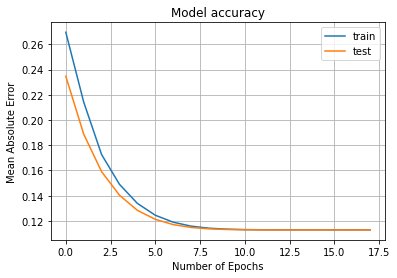

In [29]:
# summarize history for accuracy
acc = model_history.history['mean_absolute_error']
val_acc = model_history.history['val_mean_absolute_error']

plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('model_accuracy.pdf')
plt.grid()
plt.show()

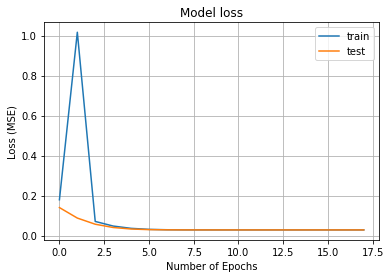

In [30]:
# summarize history for loss

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('model_loss.pdf')
plt.grid()
plt.show()

In [31]:
# To get start time of testing
tic = time.perf_counter() # start time 

In [32]:
# Making the predictions for testing

# Predicting the Test set results
y_pred = model.predict(x_test) 
# y_pred

In [33]:
# To get end time of testing
toc = time.perf_counter()  # end time

# Time taken during testing
print(f"Testing time: {toc - tic:0.3f} seconds")

Testing time: 1.941 seconds


In [34]:
y_pred.shape

(50000, 75)

In [35]:
# Evaluating the model # Test error

# Measure MSE error  
mse_test = metrics.mean_squared_error(y_test, y_pred)
print("Test Mean Squared error (MSE): {}".format(mse_test))

# Measure RMSE error 
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Test Root mean squared error (RMSE): {}".format(rmse_test))

# Measure MAE error
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print("Test Mean absolute error (MAE): {}".format(mae_test))

Test Mean Squared error (MSE): 0.028378844338636387
Test Root mean squared error (RMSE): 0.1684602158927632
Test Mean absolute error (MAE): 0.11480006457271578


In [36]:
# Making the predictions for training

# Predicting the Training set results
y_pred_train = model.predict(x_train) 
y_pred_train

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [37]:
y_pred_train.shape 

(50000, 75)

In [38]:
# Evaluating the model # Training error

# Measure MSE error  
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Training Mean Squared error (MSE): {}".format(mse_train))

# Measure RMSE error 
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("Training Root mean squared error (RMSE): {}".format(rmse_train))

# Measure MAE error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Training Mean absolute error (MAE): {}".format(mae_train))

Training Mean Squared error (MSE): 0.02840192654218083
Training Root mean squared error (RMSE): 0.16852871132890332
Training Mean absolute error (MAE): 0.11481665842686241


In [39]:
######################### Constraint verification for test data ##########################

In [40]:
y_pred = model.predict(x_test)
y_pred

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [41]:
y_pred.shape

(50000, 75)

In [42]:
y_pred[0] # First row of y_pred

array([0.05858873, 0.05854135, 0.05867425, 0.0585578 , 0.05853409,
       0.05875232, 0.05878368, 0.05909953, 0.05853726, 0.05859295,
       0.05857869, 0.05861074, 0.05863965, 0.05865666, 0.05851621,
       0.05854691, 0.05862563, 0.0586074 , 0.05860778, 0.05845178,
       0.05847598, 0.05865761, 0.05841406, 0.05868635, 0.05846363,
       0.22530937, 0.22634648, 0.22816326, 0.22874215, 0.22115603,
       0.2278976 , 0.22730054, 0.22818452, 0.22397286, 0.227113  ,
       0.22477585, 0.2260927 , 0.22629157, 0.22128846, 0.21055074,
       0.22623748, 0.22408432, 0.22688884, 0.22838503, 0.22052889,
       0.22232346, 0.22553492, 0.22673056, 0.22492653, 0.22628239,
       0.1996449 , 0.19941027, 0.20028204, 0.19936435, 0.20025012,
       0.19875672, 0.19876738, 0.20184556, 0.1988506 , 0.20118435,
       0.20360519, 0.19809476, 0.200914  , 0.19835718, 0.19823405,
       0.19670509, 0.20121452, 0.19854467, 0.2010203 , 0.20265056,
       0.20083235, 0.2009315 , 0.19787106, 0.20223759, 0.19717

In [43]:
y_pred[1] # Second row of y_pred

array([0.05858873, 0.05854135, 0.05867425, 0.0585578 , 0.05853409,
       0.05875232, 0.05878368, 0.05909953, 0.05853726, 0.05859295,
       0.05857869, 0.05861074, 0.05863965, 0.05865666, 0.05851621,
       0.05854691, 0.05862563, 0.0586074 , 0.05860778, 0.05845178,
       0.05847598, 0.05865761, 0.05841406, 0.05868635, 0.05846363,
       0.22530937, 0.22634648, 0.22816326, 0.22874215, 0.22115603,
       0.2278976 , 0.22730054, 0.22818452, 0.22397286, 0.227113  ,
       0.22477585, 0.2260927 , 0.22629157, 0.22128846, 0.21055074,
       0.22623748, 0.22408432, 0.22688884, 0.22838503, 0.22052889,
       0.22232346, 0.22553492, 0.22673056, 0.22492653, 0.22628239,
       0.1996449 , 0.19941027, 0.20028204, 0.19936435, 0.20025012,
       0.19875672, 0.19876738, 0.20184556, 0.1988506 , 0.20118435,
       0.20360519, 0.19809476, 0.200914  , 0.19835718, 0.19823405,
       0.19670509, 0.20121452, 0.19854467, 0.2010203 , 0.20265056,
       0.20083235, 0.2009315 , 0.19787106, 0.20223759, 0.19717

In [44]:
# y_pred[:0].shape

In [45]:
x_test

array([[1.34000e-05, 9.94000e-06, 5.43000e-06, ..., 2.97000e-06,
        7.15000e-07, 6.68000e-07],
       [6.35000e-05, 9.83000e-05, 4.96000e-06, ..., 9.19000e-07,
        2.46000e-07, 5.50000e-07],
       [1.38836e-04, 4.95000e-06, 2.95000e-05, ..., 3.47000e-05,
        3.18000e-05, 3.24000e-07],
       ...,
       [2.77000e-05, 1.75000e-05, 8.75000e-06, ..., 6.74000e-07,
        2.13000e-07, 2.66000e-07],
       [5.01000e-06, 4.67000e-05, 5.01000e-06, ..., 3.48000e-07,
        2.25000e-07, 2.39000e-07],
       [2.11158e-04, 3.82000e-06, 6.01000e-05, ..., 1.14000e-05,
        2.85000e-06, 4.67000e-05]])

In [46]:
x_test.shape

(50000, 40)

In [47]:
y_conc_new=y_pred
y_conc_new

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [48]:
y_conc_new.shape

(50000, 75)

In [49]:
ypd_new=y_conc_new[:,0:50] # ypd_new is the first 50 elements of y_conc_new i.e. power assignments
ypd_new

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239]], dtype=float32)

In [50]:
ypd_new.shape

(50000, 50)

In [51]:
pb=ypd_new[:,0:25] # Initial 25 elements of ypd_new
pb

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363]], dtype=float32)

In [52]:
pb.shape

(50000, 25)

In [53]:
pd=ypd_new[:,25:50] # Next 25 elements of ypd_new (25th to 50th column)
pd

array([[0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       ...,
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239]], dtype=float32)

In [54]:
pd.shape

(50000, 25)

In [55]:
ybdr_new=y_conc_new[:,50:75] # ybdr_new is the last 25 elements of y_conc_new (channel assignments), which has to be converted in binary
ybdr_new.shape

(50000, 25)

In [56]:
# Converting ybdr_new in ybd_binary such that it will have 1 and 0 (5 elements in one sub-group, and total 5 sub-groups)
# 5X5=25 elements in ybdr_new
# Logic to convert float in Binary:-
# Take 5 elements of first sub-group and assign "1" to the highest value and rest as "0" 
# and similarly for remaining sub-groups

In [57]:
ybdr_new

array([[0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.1996449 , 0.19941027, 0.20028204, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [58]:
ybdr_new[0]

array([0.1996449 , 0.19941027, 0.20028204, 0.19936435, 0.20025012,
       0.19875672, 0.19876738, 0.20184556, 0.1988506 , 0.20118435,
       0.20360519, 0.19809476, 0.200914  , 0.19835718, 0.19823405,
       0.19670509, 0.20121452, 0.19854467, 0.2010203 , 0.20265056,
       0.20083235, 0.2009315 , 0.19787106, 0.20223759, 0.19717786],
      dtype=float32)

In [59]:
ybdr_new[1]

array([0.1996449 , 0.19941027, 0.20028204, 0.19936435, 0.20025012,
       0.19875672, 0.19876738, 0.20184556, 0.1988506 , 0.20118435,
       0.20360519, 0.19809476, 0.200914  , 0.19835718, 0.19823405,
       0.19670509, 0.20121452, 0.19854467, 0.2010203 , 0.20265056,
       0.20083235, 0.2009315 , 0.19787106, 0.20223759, 0.19717786],
      dtype=float32)

In [60]:
# Converting ybdr_new in ybd_binary i.e. converting continuous channel assignments 
# into binary form based on above logic

ybd_binary=[]
for rows in ybdr_new:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    ybd_binary.append(tempList)

In [61]:
ybd_binary_array=np.array(ybd_binary) # converting list form of ybd_binary into array form 
ybd_binary_array

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [62]:
ybd_binary_array.shape

(50000, 25)

In [63]:
len(ybd_binary_array)

50000

In [64]:
len(ybd_binary_array[0]) # First row taken

25

In [65]:
ybd_binary_array[0] # First row output i.e. channel assignments

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [66]:
ybd_binary_array[1] # Second row output i.e. channel assignments

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [67]:
# Finding position of '1' in first row of ybd_binary_array i.e. Beta(i)
# Just for example here

for i in range (len(ybd_binary_array[0])):  # Here first row taken
    if ybd_binary_array[0][i]==1:
        subgroup=int((i)/5) +1
        ones_position=(i)%5 +1
        # print(subgroup)
        # print(ones_position)
        print(subgroup*10+ones_position)

13
23
31
45
54


In [68]:
# Taking all row and all columns of PB

pb=ypd_new[:,0:25]
# pb

In [69]:
len(pb)

50000

In [70]:
pb.shape[1]

25

In [71]:
pb[0]

array([0.05858873, 0.05854135, 0.05867425, 0.0585578 , 0.05853409,
       0.05875232, 0.05878368, 0.05909953, 0.05853726, 0.05859295,
       0.05857869, 0.05861074, 0.05863965, 0.05865666, 0.05851621,
       0.05854691, 0.05862563, 0.0586074 , 0.05860778, 0.05845178,
       0.05847598, 0.05865761, 0.05841406, 0.05868635, 0.05846363],
      dtype=float32)

In [72]:
# Taking all row and all columns of PD

pd=ypd_new[:,25:50]
# pd

In [73]:
len(pd)

50000

In [74]:
pd.shape[1]

25

In [75]:
pd[0]

array([0.22530937, 0.22634648, 0.22816326, 0.22874215, 0.22115603,
       0.2278976 , 0.22730054, 0.22818452, 0.22397286, 0.227113  ,
       0.22477585, 0.2260927 , 0.22629157, 0.22128846, 0.21055074,
       0.22623748, 0.22408432, 0.22688884, 0.22838503, 0.22052889,
       0.22232346, 0.22553492, 0.22673056, 0.22492653, 0.22628239],
      dtype=float32)

In [76]:
# In input Xd i.e. channel gain file (40 elements are present), initial 5 elements are GBi i.e. GB1,GB2,.....,GB5. 
# Next 5 elements are GDj i.e. GD1,GD2,....,GD5. Next 5 elements are HBj i.e. HB1,HB2,....,HB5. Next 25 elements are
# HCij, which is sub-divided into 5 sub groups namely; HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, 
# HC41,......,HC45 and HC51,........,HC55.

In [77]:
x_test_new=x_test
x_test_new

array([[1.34000e-05, 9.94000e-06, 5.43000e-06, ..., 2.97000e-06,
        7.15000e-07, 6.68000e-07],
       [6.35000e-05, 9.83000e-05, 4.96000e-06, ..., 9.19000e-07,
        2.46000e-07, 5.50000e-07],
       [1.38836e-04, 4.95000e-06, 2.95000e-05, ..., 3.47000e-05,
        3.18000e-05, 3.24000e-07],
       ...,
       [2.77000e-05, 1.75000e-05, 8.75000e-06, ..., 6.74000e-07,
        2.13000e-07, 2.66000e-07],
       [5.01000e-06, 4.67000e-05, 5.01000e-06, ..., 3.48000e-07,
        2.25000e-07, 2.39000e-07],
       [2.11158e-04, 3.82000e-06, 6.01000e-05, ..., 1.14000e-05,
        2.85000e-06, 4.67000e-05]])

In [78]:
x_test_new.shape

(50000, 40)

In [79]:
x_test_new[0]

array([1.34000000e-05, 9.94000000e-06, 5.43000000e-06, 5.90000000e-05,
       1.35000000e-05, 8.77022450e-02, 4.10030199e+00, 9.28038340e-02,
       8.28748045e-01, 5.52862322e-01, 2.06000000e-05, 2.79000000e-05,
       1.68000000e-05, 1.99476000e-04, 1.27215000e-04, 5.97000000e-07,
       8.01000000e-07, 1.53000000e-06, 6.66000000e-07, 7.49000000e-07,
       8.67000000e-06, 3.00000000e-07, 2.26000000e-07, 9.51000000e-07,
       3.01000000e-06, 1.16000000e-06, 2.24000000e-07, 2.60000000e-07,
       3.30000000e-07, 6.07000000e-07, 2.56000000e-06, 9.71000000e-07,
       1.08000000e-06, 1.78000000e-06, 3.57000000e-06, 4.67000000e-07,
       1.15000000e-06, 2.97000000e-06, 7.15000000e-07, 6.68000000e-07])

In [80]:
gb=x_test_new[:,0:5] # Taking all rows and initial 5 columns of x_test_new # GB1,GB2,.....,GB5
gb

array([[1.34000e-05, 9.94000e-06, 5.43000e-06, 5.90000e-05, 1.35000e-05],
       [6.35000e-05, 9.83000e-05, 4.96000e-06, 3.14000e-05, 6.96000e-06],
       [1.38836e-04, 4.95000e-06, 2.95000e-05, 3.79000e-06, 6.20000e-05],
       ...,
       [2.77000e-05, 1.75000e-05, 8.75000e-06, 3.75000e-05, 4.07000e-05],
       [5.01000e-06, 4.67000e-05, 5.01000e-06, 1.90000e-05, 4.36000e-06],
       [2.11158e-04, 3.82000e-06, 6.01000e-05, 4.27000e-05, 2.83000e-05]])

In [81]:
len(gb)

50000

In [82]:
gb.shape[1]

5

In [83]:
gb[0] # First row of gb

array([1.34e-05, 9.94e-06, 5.43e-06, 5.90e-05, 1.35e-05])

In [84]:
gd=x_test_new[:,5:10] # Taking all rows and columns 6 to 10 of x_test_new # GD1,GD2,....,GD5
gd

array([[8.77022450e-02, 4.10030199e+00, 9.28038340e-02, 8.28748045e-01,
        5.52862322e-01],
       [1.81600713e+00, 8.39294960e-02, 9.73210170e-02, 8.68219460e-02,
        1.91059933e+00],
       [4.07036513e-01, 2.03965251e+00, 6.50158170e-02, 2.57267306e-01,
        2.96234576e-01],
       ...,
       [2.78307398e-01, 5.51473277e-01, 3.04422368e-01, 1.06118243e+00,
        9.48972486e-01],
       [2.35333815e+01, 1.58353578e+01, 1.34195985e-01, 1.43490074e+05,
        5.97103680e-02],
       [7.93980620e-02, 7.03281250e-02, 2.94059009e+02, 1.19119705e-01,
        1.01518529e-01]])

In [85]:
len(gd),gd.shape[1]

(50000, 5)

In [86]:
gd[0]

array([0.08770224, 4.10030199, 0.09280383, 0.82874804, 0.55286232])

In [87]:
gd[1]

array([1.81600713, 0.0839295 , 0.09732102, 0.08682195, 1.91059933])

In [88]:
ybd_binary_array[0]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [89]:
len(ybd_binary_array)

50000

In [90]:
ybd_binary_array.shape[1]

25

In [91]:
# Finding corresponding value of gd where "1" is located in ybd_binary_array 

for i in range(3):  # 20000  # len(ybd_binary_array)
#     print(i)
    for j in range(ybd_binary_array.shape[1]):  # 25
#         print(j)
        if ybd_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j]
#                 print(gd1)
            elif j>=5 and j<10:
                gd1=gd[i][(j-5)]
#                 print(gd1)
            elif j>=10 and j<15:
                gd1=gd[i][(j-10)]
#                 print(gd1)
            elif j>=15 and j<20:
                gd1=gd[i][(j-15)]
#                 print(gd1)
            elif j>=20:
                gd1=gd[i][(j-20)]
#                 print(gd1)

In [92]:
hb=x_test_new[:,10:15] # Taking all rows and columns 11 to 15 of x_test_new # HB1,HB2,....,HB5
hb

array([[2.06000e-05, 2.79000e-05, 1.68000e-05, 1.99476e-04, 1.27215e-04],
       [3.03187e-04, 6.95000e-06, 6.01000e-05, 3.10000e-05, 2.85000e-05],
       [2.39893e-04, 4.44000e-05, 2.34000e-05, 3.58000e-05, 6.01000e-06],
       ...,
       [5.54000e-06, 5.23000e-06, 1.27000e-05, 5.30000e-06, 7.02000e-06],
       [3.73000e-05, 4.61000e-06, 1.13098e-04, 5.16000e-05, 2.30000e-05],
       [1.04000e-05, 8.06000e-06, 9.46000e-05, 3.77000e-05, 6.56000e-05]])

In [93]:
hb[0]

array([2.06000e-05, 2.79000e-05, 1.68000e-05, 1.99476e-04, 1.27215e-04])

In [94]:
len(hb),hb.shape[1]

(50000, 5)

In [95]:
# Finding corresponding value of hb where "1" is located in ybd_binary_array

for i in range(len(ybd_binary_array)):  # 20000
    for j in range(ybd_binary_array.shape[1]):  # 25
        if ybd_binary_array[i][j]==1:
            if j<5:
                hb1=hb[i][j]
            elif j>=5 and j<10:
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                hb1=hb[i][(j-15)]
            elif j>=20:
                hb1=hb[i][(j-20)]

In [96]:
hc=x_test_new[:,15:40] # Taking all rows and columns 16 to 40 of x_test_new
hc  # HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, HC41,......,HC45 and HC51,........,HC55

array([[5.97000e-07, 8.01000e-07, 1.53000e-06, ..., 2.97000e-06,
        7.15000e-07, 6.68000e-07],
       [4.61000e-06, 2.20000e-06, 1.47000e-06, ..., 9.19000e-07,
        2.46000e-07, 5.50000e-07],
       [8.50143e-04, 1.58000e-06, 9.32000e-07, ..., 3.47000e-05,
        3.18000e-05, 3.24000e-07],
       ...,
       [2.22000e-07, 1.85000e-07, 3.41000e-05, ..., 6.74000e-07,
        2.13000e-07, 2.66000e-07],
       [4.58000e-07, 2.41000e-07, 1.12000e-06, ..., 3.48000e-07,
        2.25000e-07, 2.39000e-07],
       [2.15000e-06, 5.31000e-07, 2.45000e-06, ..., 1.14000e-05,
        2.85000e-06, 4.67000e-05]])

In [97]:
len(hc),hc.shape[1]

(50000, 25)

In [98]:
hc[0]

array([5.97e-07, 8.01e-07, 1.53e-06, 6.66e-07, 7.49e-07, 8.67e-06,
       3.00e-07, 2.26e-07, 9.51e-07, 3.01e-06, 1.16e-06, 2.24e-07,
       2.60e-07, 3.30e-07, 6.07e-07, 2.56e-06, 9.71e-07, 1.08e-06,
       1.78e-06, 3.57e-06, 4.67e-07, 1.15e-06, 2.97e-06, 7.15e-07,
       6.68e-07])

In [99]:
# Finding corresponding value of hc where "1" is located in ybd_binary_array

for i in range(len(hc)): # 20000
    for j in range(hc.shape[1]):  # 25
        if ybd_binary_array[i][j]==1:
            print(hc[i][j])
    break

1.53e-06
2.26e-07
1.16e-06
3.57e-06
7.15e-07


In [100]:
epsilon=0.1  

hc_inverse_cdf=hc*(-1*math.log(epsilon))
hc_inverse_cdf

array([[1.37464330e-06, 1.84437066e-06, 3.52295519e-06, ...,
        6.83867773e-06, 1.64634834e-06, 1.53812684e-06],
       [1.06149173e-05, 5.06568720e-06, 3.38480009e-06, ...,
        2.11607570e-06, 5.66435933e-07, 1.26642180e-06],
       [1.95752660e-03, 3.63808445e-06, 2.14600931e-06, ...,
        7.98997027e-05, 7.32222060e-05, 7.46037570e-07],
       ...,
       [5.11173891e-07, 4.25978242e-07, 7.85181517e-05, ...,
        1.55194235e-06, 4.90450625e-07, 6.12487635e-07],
       [1.05458397e-06, 5.54923007e-07, 2.57889530e-06, ...,
        8.01299612e-07, 5.18081646e-07, 5.50317837e-07],
       [4.95055795e-06, 1.22267268e-06, 5.64133348e-06, ...,
        2.62494701e-05, 6.56236752e-06, 1.07530724e-04]])

In [101]:
len(hc_inverse_cdf),hc_inverse_cdf.shape[1]

(50000, 25)

In [102]:
hc_inverse_cdf[0]

array([1.37464330e-06, 1.84437066e-06, 3.52295519e-06, 1.53352167e-06,
       1.72463623e-06, 1.99634128e-05, 6.90775528e-07, 5.20384231e-07,
       2.18975842e-06, 6.93078113e-06, 2.67099871e-06, 5.15779061e-07,
       5.98672124e-07, 7.59853081e-07, 1.39766915e-06, 5.89461784e-06,
       2.23581013e-06, 2.48679190e-06, 4.09860147e-06, 8.22022878e-06,
       1.07530724e-06, 2.64797286e-06, 6.83867773e-06, 1.64634834e-06,
       1.53812684e-06])

In [103]:
# Finding corresponding value of hc_inverse_cdf where "1" is located in ybd_binary_array # correct

for i in range(len(hc_inverse_cdf)): # 20000
    for j in range(hc_inverse_cdf.shape[1]):  # 25
        if ybd_binary_array[i][j]==1:
            print(hc_inverse_cdf[i][j])
    break

3.5229551922808893e-06
5.203842310166543e-07
2.6709987078730923e-06
8.220228781988743e-06
1.6463483414907427e-06


In [104]:
# Constraint 1 and 2 verification for each subgroup i.e. (constraint (1(d) and 1(e)) (For Test data)
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.25892541179416
D_min=1.25892541179416

pb=ypd_new[:,0:25]
pd=ypd_new[:,25:50]
B=y_conc_new[:,50:75]
gb=x_test_new[:,0:5]
gd=x_test_new[:,5:10]
hb=x_test_new[:,10:15]

epsilon=0.3679
hc=x_test_new[:,15:40]
hc_inverse_cdf=hc*(-1*math.log(epsilon))

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_constraint1_satisfied=0
count_constraint1_not_satisfied=0

count_constraint2_satisfied=0
count_constraint2_not_satisfied=0

sm_BW=np.zeros(len(B))
B_binary_array=[]
for rows in B:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    B_binary_array.append(tempList)

for i in range (len(B)): # 20000 # ybd_binary_array
    for j in range (B.shape[1]): # 25  # ybd_binary_array
        if B_binary_array[i][j]==1:  # ybd_binary_array
            if j<5:
                gb1=gb[i][0]
                gd1=gd[i][j] 
                hb1=hb[i][j]
            elif j>=5 and j<10:
                gb1=gb[i][1]
                gd1=gd[i][j-5]
                hb1=hb[i][j-5]
            elif j>=10 and j<15:
                gb1=gb[i][2]
                gd1=gd[i][j-10]
                hb1=hb[i][j-10]
            elif j>=15 and j<20:
                gb1=gb[i][3]
                gd1=gd[i][j-15]
                hb1=hb[i][j-15]
            elif j>=20:
                gb1=gb[i][4]
                gd1=gd[i][j-20]
                hb1=hb[i][j-20]
                
            ############## SINR for constraint 1(d) 
            SINR_D=((pb_scaled[i][j]*gb1)/(NO+(pd_scaled[i][j]*hc_inverse_cdf[i][j]))) # To use scaled pb and pd
#             print(SINR_D)
            sm1=math.log2(1+SINR_D)  # sm- sum-rate for contraint 1(d)
#             print(sm1)

            if SINR_D>=C_min:
                count_constraint1_satisfied=count_constraint1_satisfied+1
#                 print("constraint1 satisfied")
            else: 
                count_constraint1_not_satisfied=count_constraint1_not_satisfied+1
#                 print("constraint1 not satisfied")

            ############## SINR for constraint 1(e)
            SINR_E=((pd_scaled[i][j]*gd1)/(NO+(pb_scaled[i][j]*hb1)))  # To use scaled pb and pd
#             print(SINR_E)
            sm2=math.log2(1+SINR_E)  # sm- sum-rate for contraint 1(e)
#             print(sm2)

            if SINR_E>=D_min:
                count_constraint2_satisfied=count_constraint2_satisfied+1
#                 print("constraint2 satisfied")
            else: 
                count_constraint2_not_satisfied=count_constraint2_not_satisfied+1
#                 print("constraint2 not satisfied")

            ########## Sum-rate calculation
            BW=15000  # Band-width
            sm_tot=sm1+sm2 # total sum-rate
#             print(sm_tot)
            sm_BW[i]=sm_BW[i]+BW*sm_tot
#             print(sm_BW) 
sm_avg_test=np.mean(sm_BW) # average sum-rate
print(sm_avg_test)

1413671.1172321825


In [105]:
sm_avg_test

1413671.1172321825

In [106]:
count_constraint1_satisfied

241411

In [107]:
count_constraint1_not_satisfied

8589

In [108]:
Perc_of_test_constraint1_satisfied=(count_constraint1_satisfied/(count_constraint1_satisfied+count_constraint1_not_satisfied))*100
Perc_of_test_constraint1_satisfied

96.56439999999999

In [109]:
Perc_of_test_constraint1_not_satisfied=100-Perc_of_test_constraint1_satisfied
Perc_of_test_constraint1_not_satisfied

3.435600000000008

In [110]:
count_constraint2_satisfied

250000

In [111]:
count_constraint2_not_satisfied

0

In [112]:
Perc_of_test_constraint2_satisfied=(count_constraint2_satisfied/(count_constraint2_satisfied+count_constraint2_not_satisfied))*100
Perc_of_test_constraint2_satisfied

100.0

In [113]:
Perc_of_test_constraint2_not_satisfied=100-Perc_of_test_constraint2_satisfied
Perc_of_test_constraint2_not_satisfied

0.0

In [114]:
####################################### Constraint Verification for Training data ####################################

In [115]:
y_pred_train = model.predict(x_train) 
y_pred_train

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [116]:
y_pred_train.shape

(50000, 75)

In [117]:
x_train

array([[2.07000e-05, 8.70000e-05, 5.42000e-06, ..., 1.53000e-06,
        5.95000e-06, 8.48000e-07],
       [5.94000e-06, 5.00000e-06, 4.46000e-06, ..., 3.84000e-06,
        4.13000e-07, 3.59000e-07],
       [2.48000e-05, 3.76000e-05, 4.85000e-06, ..., 2.76000e-07,
        3.38000e-07, 1.26000e-05],
       ...,
       [2.94322e-04, 2.54061e-04, 3.98000e-06, ..., 8.33000e-07,
        1.52000e-07, 2.85000e-07],
       [5.95000e-05, 3.95000e-06, 2.72000e-05, ..., 2.81000e-06,
        6.66000e-07, 9.19000e-07],
       [1.42721e-04, 8.10000e-06, 4.25000e-05, ..., 9.52000e-07,
        4.24000e-06, 9.48000e-07]])

In [118]:
x_train.shape

(50000, 40)

In [119]:
y_conc_train_new=y_pred_train
y_conc_train_new

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.19787106, 0.20223759,
        0.19717786]], dtype=float32)

In [120]:
y_conc_train_new.shape

(50000, 75)

In [121]:
ypd_train_new=y_conc_train_new[:,0:50] # ypd_train_new is the first 50 elements of y_conc_train_new
ypd_train_new

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.22673056, 0.22492653,
        0.22628239]], dtype=float32)

In [122]:
ypd_train_new.shape

(50000, 50)

In [123]:
pb=ypd_train_new[:,0:25] # Initial 25 elements of ypd_train_new
pb

array([[0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       ...,
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363],
       [0.05858873, 0.05854135, 0.05867425, ..., 0.05841406, 0.05868635,
        0.05846363]], dtype=float32)

In [124]:
pb.shape

(50000, 25)

In [125]:
pd=ypd_train_new[:,25:50] # Next 25 elements of ypd_train_new (25th to 50th column)
pd

array([[0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       ...,
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239],
       [0.22530937, 0.22634648, 0.22816326, ..., 0.22673056, 0.22492653,
        0.22628239]], dtype=float32)

In [126]:
pd.shape

(50000, 25)

In [127]:
ybdr_train_new=y_conc_train_new[:,50:75] # ybdr_train_new is the last 25 elements of y_conc_train_new, which has to be converted in binary
ybdr_train_new.shape

(50000, 25)

In [128]:
# Converting ybdr_train_new in ybd_train_binary such that it will have 1 and 0 (as per previous logic)

In [129]:
# ybdr_train_new

In [130]:
ybdr_train_new[0]

array([0.1996449 , 0.19941027, 0.20028204, 0.19936435, 0.20025012,
       0.19875672, 0.19876738, 0.20184556, 0.1988506 , 0.20118435,
       0.20360519, 0.19809476, 0.200914  , 0.19835718, 0.19823405,
       0.19670509, 0.20121452, 0.19854467, 0.2010203 , 0.20265056,
       0.20083235, 0.2009315 , 0.19787106, 0.20223759, 0.19717786],
      dtype=float32)

In [131]:
# Converting ybdr_train_new in ybd_train_binary i.e. converting continuous channel assignments 
# in binary form based on previous logic

ybd_train_binary=[]
for rows in ybdr_train_new:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    ybd_train_binary.append(tempList)

In [132]:
ybd_train_binary_array=np.array(ybd_train_binary) # converting list form of ybd_train_binary in array form 
ybd_train_binary_array

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

In [133]:
ybd_train_binary_array.shape

(50000, 25)

In [134]:
ybd_train_binary_array[0] # First row output i.e. channel assignments # correct

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [135]:
# Finding position of '1' in first row of ybd_train_binary_array i.e. Beta(i)
# Just for example here

for i in range (len(ybd_train_binary_array[0])):  # Here first row taken
    if ybd_train_binary_array[0][i]==1:
        subgroup=int((i)/5) +1
        ones_position=(i)%5 +1
        # print(subgroup)
        # print(ones_position)
        print(subgroup*10+ones_position)

13
23
31
45
54


In [136]:
# Taking all row and all columns of PB
pb=ypd_train_new[:,0:25]
# pb.shape[1], len(pb)

In [137]:
# Finding value of pd where "1" is present in ybd_train_binary_array (for all rows here)

pd=ypd_train_new[:,25:50]
# pd

In [138]:
len(pd), pd.shape[1]

(50000, 25)

In [139]:
# In input Xd i.e. channel gain file (40 elements are present), initial 5 elements are GBi i.e. GB1,GB2,.....,GB5. 
# Next 5 elements are GDj i.e. GD1,GD2,....,GD5. Next 5 elements are HBj i.e. HB1,HB2,....,HB5. Next 25 elements are
# HCij, which is sub-divided into 5 sub groups namely; HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, 
# HC41,......,HC45 and HC51,........,HC55.

In [140]:
x_train_new=x_train
x_train_new

array([[2.07000e-05, 8.70000e-05, 5.42000e-06, ..., 1.53000e-06,
        5.95000e-06, 8.48000e-07],
       [5.94000e-06, 5.00000e-06, 4.46000e-06, ..., 3.84000e-06,
        4.13000e-07, 3.59000e-07],
       [2.48000e-05, 3.76000e-05, 4.85000e-06, ..., 2.76000e-07,
        3.38000e-07, 1.26000e-05],
       ...,
       [2.94322e-04, 2.54061e-04, 3.98000e-06, ..., 8.33000e-07,
        1.52000e-07, 2.85000e-07],
       [5.95000e-05, 3.95000e-06, 2.72000e-05, ..., 2.81000e-06,
        6.66000e-07, 9.19000e-07],
       [1.42721e-04, 8.10000e-06, 4.25000e-05, ..., 9.52000e-07,
        4.24000e-06, 9.48000e-07]])

In [141]:
gb=x_train_new[:,0:5] # Taking all rows and initial 5 columns of x_train_new # GB1,GB2,.....,GB5
gb

array([[2.07000e-05, 8.70000e-05, 5.42000e-06, 5.91000e-06, 2.02000e-05],
       [5.94000e-06, 5.00000e-06, 4.46000e-06, 3.07000e-05, 3.25000e-05],
       [2.48000e-05, 3.76000e-05, 4.85000e-06, 1.78119e-04, 1.39000e-05],
       ...,
       [2.94322e-04, 2.54061e-04, 3.98000e-06, 3.55000e-05, 7.99000e-06],
       [5.95000e-05, 3.95000e-06, 2.72000e-05, 1.95387e-04, 3.17399e-04],
       [1.42721e-04, 8.10000e-06, 4.25000e-05, 2.31000e-05, 7.40000e-05]])

In [142]:
len(gb), gb.shape[1]

(50000, 5)

In [143]:
gd=x_train_new[:,5:10] # Taking all rows and columns 6 to 10 of x_train_new # GD1,GD2,....,GD5
gd

array([[3.79948667e+00, 8.26919620e-02, 4.55587727e+00, 7.34052280e-02,
        1.06689306e-01],
       [2.57381780e-01, 3.58181204e-01, 1.92514578e-01, 1.10031283e-01,
        2.25654919e-01],
       [5.88847850e-02, 1.02257726e+01, 6.85026330e-02, 2.20606225e-01,
        4.86874602e+00],
       ...,
       [9.07958090e-02, 7.96055470e-02, 4.33902675e-01, 2.18709810e-01,
        8.61722080e-02],
       [2.13373129e+00, 9.07773216e-01, 1.16863812e-01, 1.66591159e-01,
        1.77600570e+01],
       [9.14656344e-01, 6.79360150e-02, 8.54795894e+01, 6.62925933e-01,
        6.32941730e-02]])

In [144]:
len(gd),gd.shape[1]

(50000, 5)

In [145]:
# Finding corresponding value of gd where "1" is located in ybd_train_binary_array

for i in range(len(ybd_train_binary_array)):  # 80000
    for j in range(ybd_train_binary_array.shape[1]):  # 25
        if ybd_train_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j]
            elif j>=5 and j<10:
                gd1=gd[i][(j-5)]
            elif j>=10 and j<15:
                gd1=gd[i][(j-10)]
            elif j>=15 and j<20:
                gd1=gd[i][(j-15)]
            elif j>=20:
                gd1=gd[i][(j-20)]

In [146]:
hb=x_train_new[:,10:15] # Taking all rows and columns 11 to 15 of x_train_new # HB1,HB2,....,HB5
hb

array([[2.44000e-05, 2.34437e-04, 5.15000e-05, 1.40909e-04, 1.42000e-05],
       [1.60000e-05, 4.16000e-05, 1.95248e-04, 1.37000e-05, 4.99000e-06],
       [9.45000e-05, 3.98000e-05, 1.09000e-05, 2.28000e-05, 6.63000e-06],
       ...,
       [6.62000e-06, 1.23000e-05, 1.45737e-04, 7.20000e-06, 8.19000e-06],
       [1.79880e-04, 4.26000e-06, 1.24000e-05, 4.92000e-06, 1.46000e-05],
       [7.35000e-06, 1.30000e-05, 3.82000e-06, 1.44000e-05, 9.98000e-06]])

In [147]:
hb[0]

array([2.44000e-05, 2.34437e-04, 5.15000e-05, 1.40909e-04, 1.42000e-05])

In [148]:
len(hb),hb.shape[1]

(50000, 5)

In [149]:
# Finding corresponding value of hb where "1" is located in ybd_train_binary_array

for i in range(len(ybd_train_binary_array)):  # 80000
    for j in range(ybd_train_binary_array.shape[1]):  # 25
        if ybd_train_binary_array[i][j]==1:
            if j<5:
                hb1=hb[i][j]
            elif j>=5 and j<10:
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                hb1=hb[i][(j-15)]
            elif j>=20:
                hb1=hb[i][(j-20)]

In [150]:
hc=x_train_new[:,15:40] # Taking all rows and columns 16 to 40 of x_train_new_array
hc  # HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, HC41,......,HC45 and HC51,........,HC55

array([[4.45e-07, 1.43e-06, 6.20e-07, ..., 1.53e-06, 5.95e-06, 8.48e-07],
       [6.92e-06, 3.06e-07, 1.10e-06, ..., 3.84e-06, 4.13e-07, 3.59e-07],
       [9.27e-07, 3.71e-06, 3.23e-07, ..., 2.76e-07, 3.38e-07, 1.26e-05],
       ...,
       [1.24e-06, 7.11e-07, 6.75e-06, ..., 8.33e-07, 1.52e-07, 2.85e-07],
       [3.61e-06, 2.37e-07, 5.20e-07, ..., 2.81e-06, 6.66e-07, 9.19e-07],
       [3.77e-07, 2.75e-06, 2.27e-07, ..., 9.52e-07, 4.24e-06, 9.48e-07]])

In [151]:
len(hc),hc.shape[1]

(50000, 25)

In [152]:
hc[0]

array([4.45000e-07, 1.43000e-06, 6.20000e-07, 1.32000e-06, 2.34000e-06,
       9.80000e-07, 2.54000e-06, 1.52000e-06, 1.98597e-04, 4.03000e-06,
       1.28000e-06, 9.84000e-07, 1.11000e-06, 3.05000e-07, 1.59000e-07,
       3.45000e-07, 7.32000e-07, 4.16000e-07, 3.37000e-07, 3.16000e-07,
       1.19000e-06, 1.24000e-06, 1.53000e-06, 5.95000e-06, 8.48000e-07])

In [153]:
epsilon=0.3679

hc_inverse_cdf=hc*(-1*math.log(epsilon))
hc_inverse_cdf

array([[4.44975132e-07, 1.42992009e-06, 6.19965352e-07, ...,
        1.52991450e-06, 5.94966750e-06, 8.47952611e-07],
       [6.91961329e-06, 3.05982900e-07, 1.09993853e-06, ...,
        3.83978541e-06, 4.12976920e-07, 3.58979938e-07],
       [9.26948196e-07, 3.70979267e-06, 3.22981950e-07, ...,
        2.75984576e-07, 3.37981112e-07, 1.25992959e-05],
       ...,
       [1.23993070e-06, 7.10960267e-07, 6.74962279e-06, ...,
        8.32953449e-07, 1.51991506e-07, 2.84984073e-07],
       [3.60979826e-06, 2.36986756e-07, 5.19970941e-07, ...,
        2.80984297e-06, 6.65962782e-07, 9.18948643e-07],
       [3.76978932e-07, 2.74984632e-06, 2.26987315e-07, ...,
        9.51946799e-07, 4.23976306e-06, 9.47947023e-07]])

In [154]:
len(hc_inverse_cdf),hc_inverse_cdf.shape[1]

(50000, 25)

In [155]:
hc_inverse_cdf[0]

array([4.44975132e-07, 1.42992009e-06, 6.19965352e-07, 1.31992623e-06,
       2.33986923e-06, 9.79945235e-07, 2.53985806e-06, 1.51991506e-06,
       1.98585902e-04, 4.02977479e-06, 1.27992847e-06, 9.83945011e-07,
       1.10993797e-06, 3.04982956e-07, 1.58991115e-07, 3.44980720e-07,
       7.31959094e-07, 4.15976753e-07, 3.36981167e-07, 3.15982341e-07,
       1.18993350e-06, 1.23993070e-06, 1.52991450e-06, 5.94966750e-06,
       8.47952611e-07])

In [156]:
# Constraint 1 and 2 verification for each subgroup i.e. (constraint (1(d) and 1(e)) (For Training data)
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.25892541179416
D_min=1.25892541179416

pb=ypd_train_new[:,0:25]
pd=ypd_train_new[:,25:50]
B=y_conc_train_new[:,50:75]
gb=x_train_new[:,0:5]
gd=x_train_new[:,5:10]
hb=x_train_new[:,10:15]

epsilon=0.3679
hc=x_train_new[:,15:40]
hc_inverse_cdf=hc*(-1*math.log(epsilon))

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_train_constraint1_satisfied=0
count_train_constraint1_not_satisfied=0

count_train_constraint2_satisfied=0
count_train_constraint2_not_satisfied=0

# Converting ybdr_train_new in ybd_train_binary i.e. converting continuous channel assignments 
# in binary form based on previous logic

sm_BW=np.zeros(len(B))
B_binary_array=[]

for rows in B:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    B_binary_array.append(tempList)

for i in range (len(B)): # 80000
    for j in range (B.shape[1]): # 25
        if B_binary_array[i][j]==1:  
            if j<5:
                gb1=gb[i][0] 
                gd1=gd[i][j] 
                hb1=hb[i][j]
            elif j>=5 and j<10:
                gb1=gb[i][1]
                gd1=gd[i][(j-5)]
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                gb1=gb[i][2]
                gd1=gd[i][(j-10)]
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                gb1=gb[i][3]
                gd1=gd[i][(j-15)]
                hb1=hb[i][(j-15)]
            elif j>=20:
                gb1=gb[i][4] 
                gd1=gd[i][(j-20)]
                hb1=hb[i][(j-20)]
                
            ############## SINR for constraint 1(d) 
            SINR_D=((pb_scaled[i][j]*gb1)/(NO+(pd_scaled[i][j]*hc_inverse_cdf[i][j])))  # To use scaled pb and pd
#             print(SINR_D)
            sm1=math.log2(1+SINR_D)  # sm- sum-rate for contraint 1(d)
#             print(sm1)

            if SINR_D>=C_min:
                count_train_constraint1_satisfied=count_train_constraint1_satisfied+1
#                 print("Constraint1 for training satisfied")
            else: 
                count_train_constraint1_not_satisfied=count_train_constraint1_not_satisfied+1
#                 print("Constraint1 for training not satisfied")

            ############## SINR for constraint 1(e) 
            SINR_E=((pd_scaled[i][j]*gd1)/(NO+(pb_scaled[i][j]*hb1)))  # To use scaled pb and pd
#             print(SINR_E)
            sm2=math.log2(1+SINR_E)  # sm- sum-rate for contraint 1(e)
#             print(sm2)

            if SINR_E>=D_min:
                count_train_constraint2_satisfied=count_train_constraint2_satisfied+1
#                 print("Constraint2 of training satisfied")
            else: 
                count_train_constraint2_not_satisfied=count_train_constraint2_not_satisfied+1
#                 print("Constraint2 of training not satisfied")

            ########## Sum-rate calculation
            BW=15000  # Band-width
            sm_tot=sm1+sm2 # total sum-rate
#             print(sm_tot) 
            sm_BW[i]=sm_BW[i]+BW*sm_tot
#             print(sm_BW) 
sm_avg_train=np.mean(sm_BW) # average sum-rate
print(sm_avg_train)

1414297.6236531332


In [157]:
sm_avg_train

1414297.6236531332

In [158]:
count_train_constraint1_satisfied

241475

In [159]:
count_train_constraint1_not_satisfied

8525

In [160]:
Perc_of_train_constraint1_satisfied=(count_train_constraint1_satisfied/(count_train_constraint1_satisfied+count_train_constraint1_not_satisfied))*100
Perc_of_train_constraint1_satisfied

96.59

In [161]:
Perc_of_train_constraint1_not_satisfied=100-Perc_of_train_constraint1_satisfied
Perc_of_train_constraint1_not_satisfied

3.4099999999999966

In [162]:
count_train_constraint2_satisfied

250000

In [163]:
count_train_constraint2_not_satisfied

0

In [164]:
Perc_of_train_constraint2_satisfied=(count_train_constraint2_satisfied/(count_train_constraint2_satisfied+count_train_constraint2_not_satisfied))*100
Perc_of_train_constraint2_satisfied

100.0

In [165]:
Perc_of_train_constraint2_not_satisfied=100-Perc_of_train_constraint2_satisfied
Perc_of_train_constraint2_not_satisfied

0.0

In [166]:
# done